Sign language is a visual way of communicating through hand signals, gestures, facial expressions, and body language.

Sign language is the primary form of communication for the deaf and hard of hearing community, but sign language can be useful for other groups of people as well. People with disabilities, including autism, apraxia of speech, cerebral palsy, and Down syndrome, may also find sign language beneficial for communication.

The dataset we’ll be using here is a montage panel of cropped images from various users and backgrounds for American Sign Language letters.

This dataset was inspired by Fashion-MNIST and Sreehari’s machine learning pipeline for gestures. Now let’s start with classifying sign language by importing the necessary libraries and the dataset:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
data_train=pd.read_csv('sign_mnist_train.csv')
data_test=pd.read_csv('sign_mnist_test.csv')

Now we will move to the data preparation for our machine learning model. First we will prepare the data then we will split the data into training and test sets:

In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)


#training_images = np.expand_dims(training_images, axis=3)
#testing_images = np.expand_dims(testing_images, axis=3)

In [4]:
training_images = data_train.iloc[:,1:].values
training_labels = data_train.iloc[:,0].values

testing_images = data_test.iloc[:,1:].values
testing_labels = data_test.iloc[:,0].values

training_images = training_images.reshape(-1,28,28,1)
testing_images = testing_images.reshape(-1,28,28,1)


print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(27455, 28, 28, 1)
(27455,)
(7172, 28, 28, 1)
(7172,)


Now let’s have a look at the first 10 images in the dataset:

In [6]:
import matplotlib.pyplot as plt

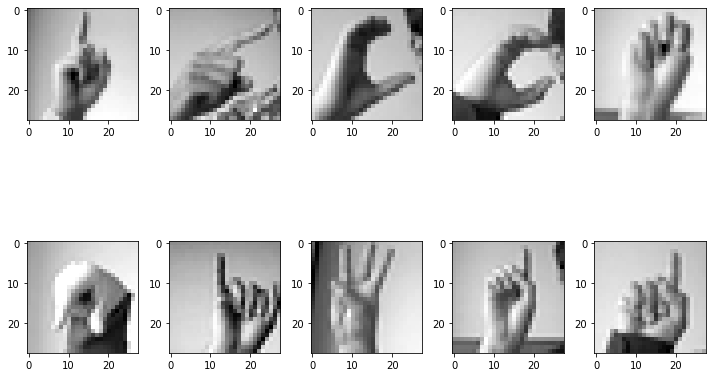

In [7]:
# Plotting the first 10 images 
fig, ax = plt.subplots(2,5) 
fig.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(training_images[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

Now, we will create an ImageDataGenerator and do Image Augmentation of the dataset:

In [9]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
    rescale=1 / 255
)


print(training_images.shape)
print(testing_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

In [11]:
# Compile Model. 
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=32),
                              steps_per_epoch=len(training_images) / 32,
                              epochs=10,
                              validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32),
                              validation_steps=len(testing_images) / 32)


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
857/857 [==============================] - 47s 49ms/step - loss: 2.9221 - accuracy: 0.1231 - val_loss: 1.5110 - val_accuracy: 0.4996
Epoch 2/10
857/857 [==============================] - 40s 47ms/step - loss: 1.8926 - accuracy: 0.3962 - val_loss: 1.0341 - val_accuracy: 0.6421
Epoch 3/10
857/857 [==============================] - 41s 48ms/step - loss: 1.4726 - accuracy: 0.5230 - val_loss: 0.9401 - val_accuracy: 0.6620
Epoch 4/10
857/857 [==============================] - 36s 42ms/step - loss: 1.1780 - accuracy: 0.6108 - val_loss: 0.6932 - val_accuracy: 0.7543
Epoch 5/10
857/857 [==============================] - 36s 42ms/step - loss: 1.0111 - accuracy: 0.6694 - val_loss: 0.5700 - val_accuracy: 0.7988
Epoch 6/10
857/857 [==============================] - 42s 49ms/step - loss: 0.8799 - accuracy: 0.7064 - val_loss: 0.3900 - val_accuracy: 0.8628
Epoch 7/10
857/857 [==============================] - 35s 41ms/step - loss: 0.7825 - accuracy: 0.7391 - val_loss: 0.4279 - val_accuracy:

In [13]:
model.evaluate(testing_images, testing_labels, verbose=0)

[159.74948120117188, 0.6602063775062561]

Now let’s have a look at the accuracy and validation score of the model:

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

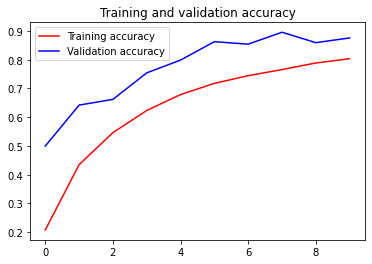

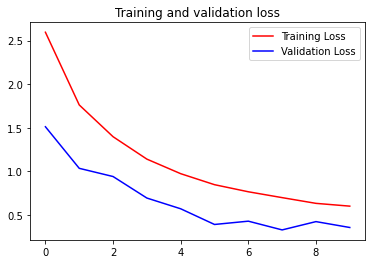

In [15]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()


plt.show()

Now let’s make a classification report and test our model:

In [16]:
# Predictions 
predictions = model.predict_classes(testing_images)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1

predictions[:5]   

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([ 2,  5, 11,  0,  3], dtype=int64)

In [17]:
# Precision, recall, f1-score for all the classes
from sklearn.metrics import classification_report, confusion_matrix

classes = ["Class " + str(i) for i in range(26) if i != 9]
print(classification_report(data_test['label'], predictions, target_names = classes))


# Confusion Matrix for the model predictions
cm = confusion_matrix(data_test['label'],predictions)

              precision    recall  f1-score   support

     Class 0       0.70      0.90      0.79       331
     Class 1       0.97      0.77      0.86       432
     Class 2       0.82      0.95      0.88       310
     Class 3       0.51      0.69      0.58       245
     Class 4       0.88      0.52      0.66       498
     Class 5       0.69      0.99      0.81       247
     Class 6       0.31      0.19      0.23       348
     Class 7       1.00      0.33      0.50       436
     Class 8       0.46      0.97      0.62       288
    Class 10       0.00      0.00      0.00       331
    Class 11       0.00      0.00      0.00       209
    Class 12       0.00      0.00      0.00       394
    Class 13       0.00      0.00      0.00       291
    Class 14       0.00      0.00      0.00       246
    Class 15       0.01      0.01      0.01       347
    Class 16       0.00      0.00      0.00       164
    Class 17       0.00      0.00      0.00       144
    Class 18       0.00    

C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Waqas.Ali\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result

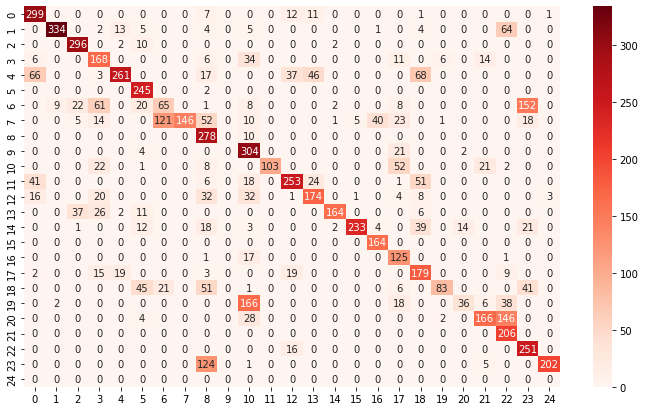

In [19]:
import seaborn as sns

plt.figure(figsize=(12,7))
g = sns.heatmap(cm, cmap='Reds',annot=True,fmt='')